In [1]:
import nltk
import sys
from collections import Counter
import pandas as pd
from os import listdir
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

In [2]:
folder = 'training-monolingual.tokenized.shuffled/'

# Part 1 : Counting Words without transformation

In [45]:
def count_words(folder):
    files = listdir(folder)
    wc = Counter()
    times = []
    types = []
    start_time = time.time()
    for fn in tqdm(files):
        with open(folder+fn, 'r',encoding="utf8") as f:
            corpus = f.read()
            tokens = corpus.split(' ')
            wc += Counter(tokens) # word_tokenize(object)
            times.append(time.time() - start_time)
            types.append(len(wc))
        f.close()
    total_time = (time.time() - start_time)
    print("Total time : --- %s seconds ---" % total_time)
    return total_time, wc, times, types

In [46]:
total_time, wc, times, types = count_words(folder)

100%|██████████| 99/99 [03:12<00:00,  1.94s/it]

Total time : --- 192.07884645462036 seconds ---


In [47]:
df = pd.DataFrame.from_dict(wc, orient='index', columns = ['frequency'])
print(df)


                        frequency
The                        850976
U.S.                       604446
Centers                      8790
for                       6508821
Disease                      8708
...                           ...
.\nCarefully-regulated          1
LabNearly                       1
benefitsor                      1
Ndoungou                        1
un-prepossessing                1

[2851884 rows x 1 columns]


In [48]:
total_words = df['frequency'].sum()
total_types = len(df)

In [49]:
# number of tokens
print("Number of tokens: ", total_words)
# vocab size: len(wc) = = len(df)
vocab_size = len(wc)
print("Vocab size: ", len(wc))

Number of tokens:  738347955
Vocab size:  2851884


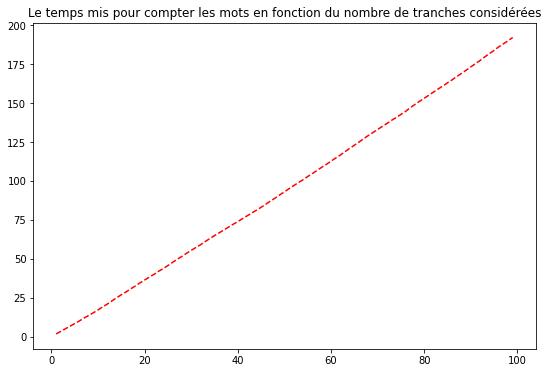

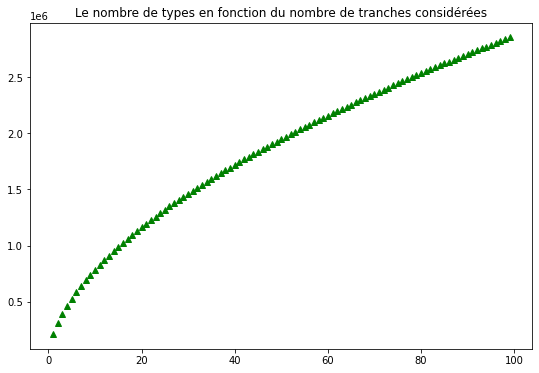

In [50]:
tranches = list(range(1,100))
plt.figure(figsize=(9,6))
plt.plot(tranches, times,'r--')
plt.title("Le temps mis pour compter les mots en fonction du nombre de tranches considérées")
plt.show()

plt.figure(figsize=(9,6))
plt.plot(tranches, types , 'g^')
plt.title("Le nombre de types en fonction du nombre de tranches considérées")
plt.show()

# Part 2 : Multiple transformations comparison


In [3]:
!pip install clean-text

In [4]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from nltk.stem import 	WordNetLemmatizer

from cleantext import clean

nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stopwords_english = stopwords.words('english')

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kacem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# todo test combined Vs separated
def count_words(folder, lower = False, numeric = False, url = False, 
                stem = False, lem = False, puncts = False, stopwords = False):
    files = listdir(folder)
    wc = Counter()
    times = []
    types = []
    start_time = time.time()
    for fn in tqdm(files):
        with open(folder+fn, 'r',encoding="utf8") as f:
            corpus = f.read()
            if numeric or url:
                corpus = clean(corpus,fix_unicode=False,to_ascii = False,
                            lower=False, no_numbers=numeric,
                            replace_with_number="__NUM__", no_urls=url,
                            replace_with_url="__URL__")
            tokens = corpus.split(' ')
            if puncts:
                tokens = [ t for t in tokens if t not in string.punctuation]
            if lower:
                tokens = [t.lower() for t in tokens]
            if stem:
                tokens = [stemmer.stem(t) for t in tokens]
            if lem: 
                tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
            if stopwords:
                tokens = [ t for t in tokens if t not in stopwords_english]               
            
            wc += Counter(tokens)
            times.append(time.time() - start_time)
            types.append(len(wc))
        f.close()
    total_time = (time.time() - start_time)
    vocab_size = len(wc)
    print("Vocab size :", vocab_size)
    print("Total time : --- %s seconds ---" % total_time)
    return total_time, vocab_size, times, types


### Transformations :

In [6]:
# simple: no transformation
total_time, vocab_size, times, types = count_words(folder, lower = False, numeric = False, 
                                        url = False, stem = False, lem = False, 
                                        puncts = False, stopwords = False)

100%|██████████| 99/99 [02:32<00:00,  1.54s/it]


Vocab size : 2851884
Total time : --- 152.50782895088196 seconds ---


In [9]:
# transformation 1 : lower
total_time_1, vocab_size_1, times_1, types_1 = count_words(folder, lower = True, numeric = False, 
                                        url = False, stem = False, lem = False, 
                                        puncts = False, stopwords = False)


100%|██████████| 99/99 [03:30<00:00,  2.12s/it]


Vocab size : 2613568
Total time : --- 210.2844386100769 seconds ---


In [10]:
# transformation 2 : no puncts
total_time_2, vocab_size_2, times_2, types_2 = count_words(folder, lower = False, numeric = False, 
                                        url = False, stem = False, lem = False, 
                                        puncts = True, stopwords = False)


100%|██████████| 99/99 [03:34<00:00,  2.17s/it]

Vocab size : 2851852
Total time : --- 214.3444745540619 seconds ---


In [11]:
# transformation 3 : no stopwords
total_time_3, vocab_size_3, times_3, types_3 = count_words(folder, lower = False, numeric = False, 
                                        url = False, stem = False, lem = False, 
                                        puncts = False, stopwords = True)


100%|██████████| 99/99 [18:47<00:00, 11.39s/it]


Vocab size : 2851731
Total time : --- 1127.523307800293 seconds ---


In [12]:
# transformation 4 : stem
total_time_4, vocab_size_4, times_4, types_4 = count_words(folder, lower = False, numeric = False, 
                                        url = False, stem = True, lem = False, 
                                        puncts = False, stopwords = False)


100%|██████████| 99/99 [2:38:20<00:00, 95.97s/it]   


Vocab size : 2359704
Total time : --- 9500.614163637161 seconds ---


In [13]:
# transformation 5 : lem
total_time_5, vocab_size_5, times_5, types_5  = count_words(folder, lower = False, numeric = False, 
                                        url = False, stem = False, lem = True, 
                                        puncts = False, stopwords = False)


100%|██████████| 99/99 [36:57<00:00, 22.40s/it]


Vocab size : 2829068
Total time : --- 2217.9605841636658 seconds ---


In [7]:
# transformation 6 : no numeric
total_time_6, vocab_size_6, times_6, types_6 = count_words(folder, lower = False, numeric = True, 
                                        url = False, stem = False, lem = False, 
                                        puncts = False, stopwords = False)


100%|██████████| 99/99 [13:46<00:00,  8.35s/it]


Vocab size : 2516225
Total time : --- 826.4670424461365 seconds ---


In [8]:
# transformation 7 : no url
total_time_7, vocab_size_7, times_7, types_7 = count_words(folder, lower = False, numeric = False, 
                                        url = True, stem = False, lem = False, 
                                        puncts = False, stopwords = False)


100%|██████████| 99/99 [12:42<00:00,  7.71s/it]


Vocab size : 2783355
Total time : --- 762.9262902736664 seconds ---


In [127]:
# save the curves data in csv files
all_times = [times, times_1, times_2, times_3, times_4, times_5, times_6, times_7]
all_types = [types, types_1, types_2, types_3, types_4, types_5, times_6, times_7]
import numpy as np
np.savetxt("csv/times.csv", 
           all_times,
           delimiter =", ", 
           fmt ='% s')
np.savetxt("csv/types.csv", 
           all_types,
           delimiter =", ", 
           fmt ='% s')


In [150]:
transformations = ['none','lower','no puncts','no stopwords','stemming','lemmatization','no numeric','no url']
vocab_sizes = [vocab_size, vocab_size_1, vocab_size_2, vocab_size_3, vocab_size_4, vocab_size_5, vocab_size_6, vocab_size_7]
total_times = [total_time, total_time_1, total_time_2, total_time_3, total_time_4, total_time_5, total_time_6, total_time_7]

In [133]:
def plot_curve(values, transformations, title = '',xlabel = '',ylabel='',n=100):
    tranches = list(range(1,n))
    plt.figure(figsize=(12,9))
    for i in range(len(transformations)):
        plt.plot(tranches, values[i], label=transformations[i])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="upper left")
    plt.show()

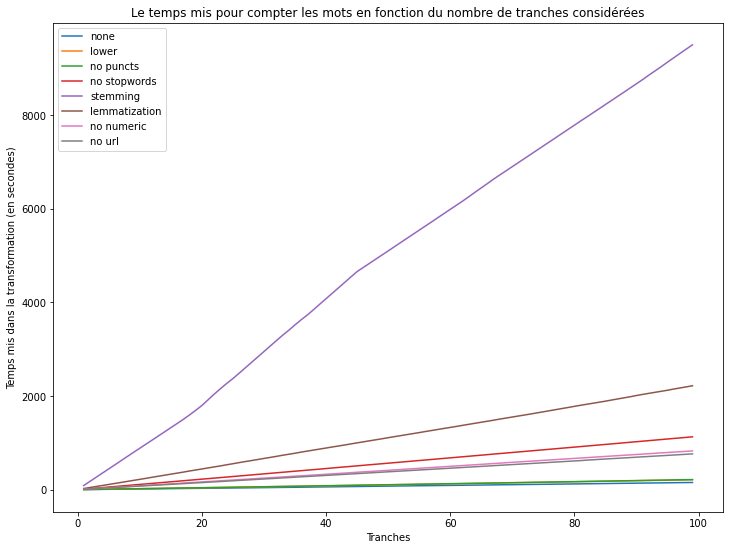

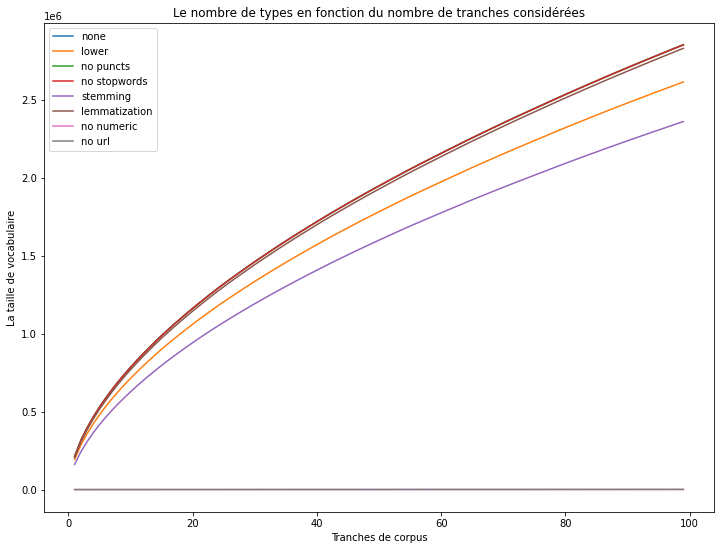

In [135]:
plot_curve(all_times,transformations,
           title="Le temps mis pour compter les mots en fonction du nombre de tranches considérées",
          xlabel = "Tranches",
          ylabel = "Temps mis dans la transformation (en secondes)")
plot_curve(all_types,transformations, 
           title="Le nombre de types en fonction du nombre de tranches considérées",
          xlabel = "Tranches de corpus",
          ylabel = "La taille de vocabulaire")

In [55]:
d = {'Transformations': transformations, 'Vocabulary size': vocab_sizes, 'Execution time (s)': total_times, 
     'Reduced Vocab ‰': [(v - vocab_sizes[0])*1000/vocab_sizes[0] for v in vocab_sizes],'Lost time': [t - total_times[0] for t in total_times] }
df_results = pd.DataFrame(data=d)

In [56]:
df_results

,Transformations,Vocabulary size,Execution time (s),Reduced Vocab ‰,Lost time
0,none,2851884,152.507829,0.000000,0.000000
1,lower,2613568,210.284439,-83.564409,57.776610
2,no puncts,2851852,214.344475,-0.011221,61.836646
3,no stopwords,2851731,1127.523308,-0.053649,975.015479
4,stemming,2359704,9500.614164,-172.580652,9348.106335
5,lemmatization,2829068,2217.960584,-8.000325,2065.452755
6,no numeric,2516225,826.467042,-117.697284,673.959213
7,no url,2783355,762.926290,-24.029378,610.418461


In [57]:
df_results.sort_values(by=['Vocabulary size'])

,Transformations,Vocabulary size,Execution time (s),Reduced Vocab ‰,Lost time
4,stemming,2359704,9500.614164,-172.580652,9348.106335
6,no numeric,2516225,826.467042,-117.697284,673.959213
1,lower,2613568,210.284439,-83.564409,57.776610
7,no url,2783355,762.926290,-24.029378,610.418461
5,lemmatization,2829068,2217.960584,-8.000325,2065.452755
3,no stopwords,2851731,1127.523308,-0.053649,975.015479
2,no puncts,2851852,214.344475,-0.011221,61.836646
0,none,2851884,152.507829,0.000000,0.000000


In [58]:
df_results.sort_values(by=['Execution time (s)'])

,Transformations,Vocabulary size,Execution time (s),Reduced Vocab ‰,Lost time
0,none,2851884,152.507829,0.000000,0.000000
1,lower,2613568,210.284439,-83.564409,57.776610
2,no puncts,2851852,214.344475,-0.011221,61.836646
7,no url,2783355,762.926290,-24.029378,610.418461
6,no numeric,2516225,826.467042,-117.697284,673.959213
3,no stopwords,2851731,1127.523308,-0.053649,975.015479
5,lemmatization,2829068,2217.960584,-8.000325,2065.452755
4,stemming,2359704,9500.614164,-172.580652,9348.106335


In [122]:
import matplotlib.pyplot as plt

def plot_vocab_time_per_transf(total_times,vocab_sizes, transformations):
    fig, ax = plt.subplots(figsize=(9,6))
    for i in range(len(transformations)):

        ax.scatter(total_times[i],vocab_sizes[i],  label=transformations[i],
                   alpha=1)

    ax.legend()
    ax.grid(True)
    plt.title("La taille de vocabulaire en fonction de temps mis dans la transformation")
    plt.xlabel("Temps mis dans la transformation (en secondes)")
    plt.ylabel("La taille de vocabulaire")
    plt.show()


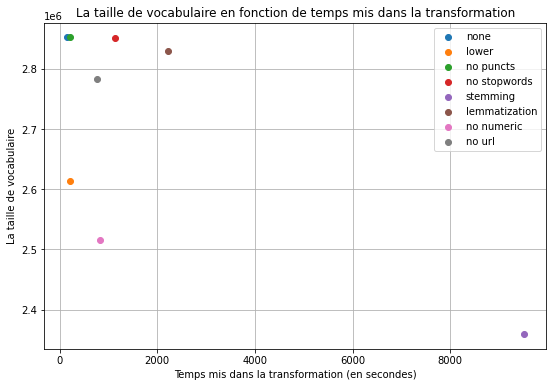

In [123]:
plot_vocab_time_per_transf(total_times,vocab_sizes, transformations)

## Chosen transformations: Execution time wise
{lower, no puncts, no url, no numeric}

In [164]:
def count_words_multiple_1(folder, lower = False, numeric = False, url = False, 
                stem = False, lem = False, puncts = False, stopwords = False):
    files = listdir(folder)
    wc = Counter()
    times = []
    types = []
    start_time = time.time()
    for fn in tqdm(files):
        with open(folder+fn, 'r',encoding="utf8") as f:
            corpus = f.read()
            if numeric or url:
                corpus = clean(corpus,fix_unicode=False,to_ascii = False,
                            no_numbers=numeric, #no_punct = puncts, lower=lower,
                            replace_with_number="__NUM__", no_urls=url,
                            replace_with_url="__URL__")
            tokens = corpus.split(' ')
            if puncts and lower:
                tokens = [ t.lower() for t in tokens if t not in string.punctuation]
            
            wc += Counter(tokens)
            times.append(time.time() - start_time)
            types.append(len(wc))
        f.close()
    total_time = (time.time() - start_time)
    vocab_size = len(wc)
    print("Vocab size :", vocab_size)
    print("Total time : --- %s seconds ---" % total_time)
    return total_time, vocab_size, times, types, wc

In [61]:
# transformation  : lower, no puncts, no url, no numeric
total_time_i, vocab_size_i, times_i, types_i, wc_i = count_words_multiple_1(folder, lower = True, numeric = True, 
                                        url = True, stem = False, lem = False, 
                                        puncts = True, stopwords = False)

100%|██████████| 99/99 [21:39<00:00, 13.12s/it]

Vocab size : 11003397
Total time : --- 1299.2733478546143 seconds ---


## Chosen transformations: Vocabulary size wise
{stemming, no numeric, lower, no url}

In [63]:
def count_words_multiple_2(folder, lower = False, numeric = False, url = False, 
                stem = False, lem = False, puncts = False, stopwords = False):
    files = listdir(folder)
    wc = Counter()
    times = []
    types = []
    start_time = time.time()
    for fn in tqdm(files):
        with open(folder+fn, 'r',encoding="utf8") as f:
            corpus = f.read()
            if numeric or url:
                corpus = clean(corpus,fix_unicode=False,to_ascii = False,
                            lower=lower, no_numbers=numeric,
                            replace_with_number="__NUM__", no_urls=url,
                            replace_with_url="__URL__")
            tokens = corpus.split(' ')
            #if puncts and lower:
            #    tokens = [ t.lower() for t in tokens if t not in string.punctuation]
            if stem:
                tokens = [stemmer.stem(t) for t in tokens]
            if lem: 
                tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
            if stopwords:
                tokens = [ t for t in tokens if t not in stopwords_english] 
            wc += Counter(tokens)
            times.append(time.time() - start_time)
            types.append(len(wc))
        f.close()
    total_time = (time.time() - start_time)
    vocab_size = len(wc)
    print("Vocab size :", vocab_size)
    print("Total time : --- %s seconds ---" % total_time)
    return total_time, vocab_size, times, types, wc

In [64]:
# transformation  : stemming, no numeric, lower, no url
total_time_ii, vocab_size_ii, times_ii, types_ii, wc_ii = count_words_multiple_2(folder, lower = True, numeric = True, 
                                        url = True, stem = True, lem = False, 
                                        puncts = False, stopwords = False)

100%|██████████| 99/99 [2:44:41<00:00, 99.81s/it]   


Vocab size : 1955360
Total time : --- 9881.107899665833 seconds ---


### Comparison : Execution time wise wise Vs Vocabulary size wise

In [159]:
new_transformations = transformations + ['low/no_puncts/no_url/no_num','stem/no_num/low/no_url']
new_vocab_sizes = vocab_sizes + [vocab_size_i,vocab_size_ii]
new_total_times = total_times + [total_time_i,total_time_ii]


In [160]:
new_transformations

['none',
 'lower',
 'no puncts',
 'no stopwords',
 'stemming',
 'lemmatization',
 'no numeric',
 'no url',
 'low/no_puncts/no_url/no_num',
 'stem/no_num/low/no_url']

In [161]:
new_vocab_sizes

[2851884,
 2613568,
 2851852,
 2851731,
 2359704,
 2829068,
 2516225,
 2783355,
 11003397,
 1955360]

In [162]:
new_total_times

[152.50782895088196,
 210.2844386100769,
 214.3444745540619,
 1127.523307800293,
 9500.614163637161,
 2217.9605841636658,
 826.4670424461365,
 762.9262902736664,
 1299.2733478546143,
 9881.107899665833]

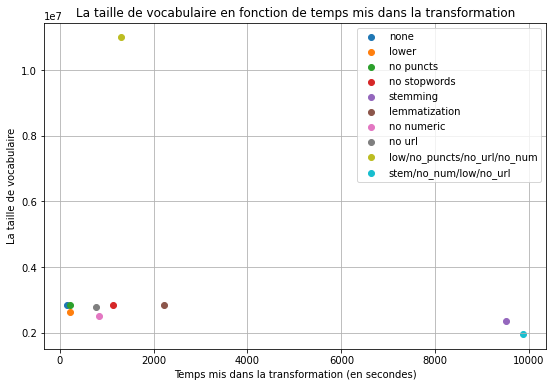

In [163]:
plot_vocab_time_per_transf(new_total_times,new_vocab_sizes, new_transformations)